# **Informe Técnico: Análisis Descriptivo del Dataset**

**Autor**: Carlos Estiven Marin Ruiz  
## **1. Descargar el dataset**
El primer paso consiste en leer el archivo CSV que contiene el dataset. Para ello, utilizamos la biblioteca `pandas` que permite cargar datos desde una URL de un archivo CSV.

El archivo se encuentra almacenado en un repositorio de GitHub. Usamos la función `pd.read_csv()` de `pandas`, que permite cargar el contenido del archivo CSV en un DataFrame, lo cual facilita su manipulación para el análisis.

El siguiente código se encargará de leer el archivo CSV desde la URL:
## Hay 14 atributos en cada caso del conjunto de datos. Estos son:
- **CRIM**: tasa de criminalidad per cápita por ciudad.
- **ZN**: proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.
- **INDUS**: proporción de acres comerciales no minoristas por ciudad.
- **CHAS**: variable ficticia del río Charles (1 si el tramo limita con el río; 0 en caso contrario).
- **NOX**: concentración de óxidos de nitrógeno (partes por cada 10 millones).
- **RM**: número promedio de habitaciones por vivienda.
- **AGE**: proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
- **DIS**: distancias ponderadas a cinco centros de empleo de Boston.
- **RAD**: índice de accesibilidad a carreteras radiales.
- **TAX**: tasa de impuesto sobre la propiedad de valor total por cada $10,000.
- **PTRATIO**: proporción de alumnos por maestro por ciudad.
- **B**: 1000(Bk - 0.63)^2 donde Bk es la proporción de personas de raza negra por ciudad.
- **LSTAT**: % de la población de estatus socioeconómico bajo.
- **MEDV**: Valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares.

In [49]:
# Importamos las bibliotecas necesarias: 'pandas' para manipulación de datos y 'numpy' para cálculos matemáticos
import pandas as pd
import numpy as np

# URL del archivo CSV ubicado en un repositorio de GitHub
# En este paso, utilizamos la función pd.read_csv() para leer el archivo y cargarlo en un DataFrame de pandas
url = 'https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv'
# Leemos el archivo CSV y lo cargamos en un DataFrame llamado 'df' para trabajar con los datos en forma tabular
df = pd.read_csv(url)
# Visualizamos las primeras filas del DataFrame para asegurarnos de que los datos se han cargado correctamente
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## **2. Preparación de los Datos**

El siguiente paso es preparar los datos para la regresión lineal. Tomaremos la columna **'rm'** (número de habitaciones) como variable independiente y la columna **'medv'** (valor medio de las viviendas) como variable dependiente. Luego, escalaremos los datos para mejorar la convergencia del algoritmo de gradiente descendente.

In [50]:
import numpy as np

# Selección de las variables independiente y dependiente
X = df['rm'].values.reshape(-1, 1)  # Número de habitaciones
y = df['medv'].values  # Valor medio de las viviendas

# Escalar manualmente los datos (normalización min-max)
X_scaled = (X - np.min(X)) / (np.max(X) - np.min(X))
y_scaled = (y - np.min(y)) / (np.max(y) - np.min(y))

# Agregar una columna de unos para el término de bias (intercepto)
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

## **3. Implementación del Algoritmo de Gradiente Descendente**

Implementaremos el algoritmo de **gradiente descendente** para encontrar los coeficientes óptimos que minimicen el error cuadrático medio (MSE) en nuestra regresión lineal. El algoritmo actualizará los parámetros de la regresión iterativamente.

In [51]:
# Función de predicción de la regresión lineal
def predict(X, theta):
    return X.dot(theta)

# Función de costo: Error cuadrático medio (MSE)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = predict(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Algoritmo de gradiente descendente
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = predict(X, theta)
        theta = theta - (1 / m) * learning_rate * X.T.dot(predictions - y)
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# Inicialización de los parámetros (theta)
theta = np.random.randn(2)

# Parámetros del algoritmo
learning_rate = 0.01
iterations = 1000

# Ejecutar el gradiente descendente
theta_optimal, cost_history = gradient_descent(X_b, y_scaled, theta, learning_rate, iterations)

# Mostrar los parámetros optimizados
print("Parámetros optimizados (theta):", theta_optimal)

Parámetros optimizados (theta): [-0.50386712  1.70277681]


## **4. Visualización de la Convergencia y la Línea de Regresión**

A continuación, visualizamos la convergencia del algoritmo y la línea de regresión ajustada sobre los datos escalados. Utilizaremos **Matplotlib** para graficar el costo a lo largo de las iteraciones y la línea de regresión.

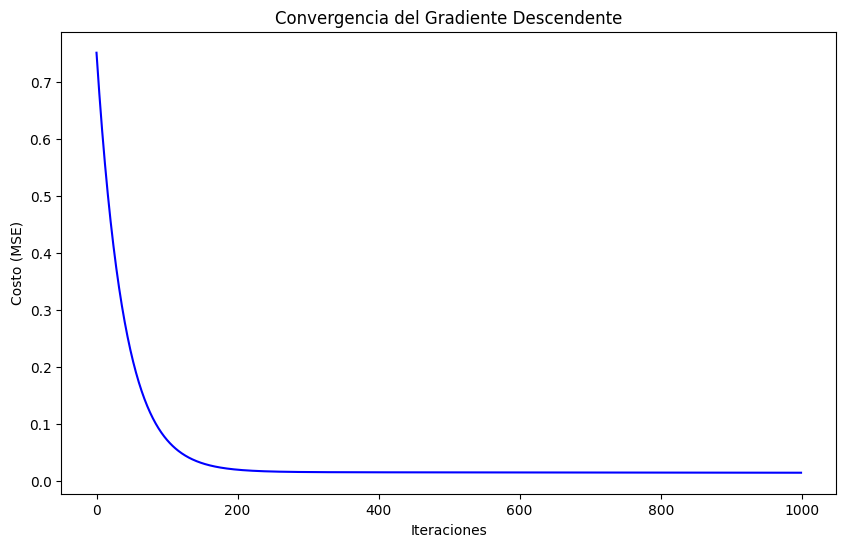

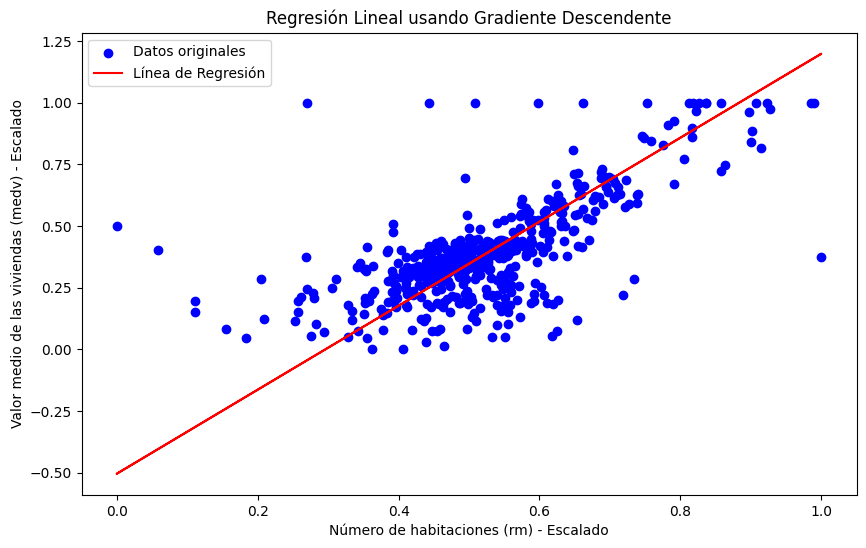

In [52]:
import matplotlib.pyplot as plt

# Gráfico de la convergencia del costo (MSE) a lo largo de las iteraciones
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, 'b-')
plt.title('Convergencia del Gradiente Descendente')
plt.xlabel('Iteraciones')
plt.ylabel('Costo (MSE)')
plt.show()

# Gráfico de la línea de regresión ajustada
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y_scaled, color='blue', label='Datos originales')
plt.plot(X_scaled, predict(X_b, theta_optimal), color='red', label='Línea de Regresión')
plt.title('Regresión Lineal usando Gradiente Descendente')
plt.xlabel('Número de habitaciones (rm) - Escalado')
plt.ylabel('Valor medio de las viviendas (medv) - Escalado')
plt.legend()
plt.show()

## **5. Conclusión del Informe**

El algoritmo de gradiente descendente, implementado completamente con **NumPy**, fue utilizado para ajustar un modelo de regresión lineal que predice el valor medio de las viviendas en función del número de habitaciones. La visualización de la convergencia muestra que el costo disminuye de manera constante, lo que sugiere que el algoritmo está optimizando correctamente los parámetros.

La línea de regresión ajustada demuestra una relación positiva entre el número de habitaciones y el valor de las viviendas. Esto es consistente con lo esperado: más habitaciones suelen estar asociadas a propiedades de mayor valor. Sin embargo, algunos puntos fuera del ajuste indican que factores adicionales, no considerados en este modelo, podrían estar influyendo en el precio de las viviendas.

En general, el gradiente descendente es una herramienta eficaz para realizar regresiones lineales, y su implementación en **NumPy** es sencilla y eficiente para problemas como este. Para mejorar el rendimiento del modelo, se podrían explorar tasas de aprendizaje más avanzadas o añadir más variables explicativas.
